In [1]:
using Plots, SparseArrays, LinearAlgebra;
include("helmholtz_eq_2d.jl");

In [2]:
Nx = 101;
Ny = 101;
h = 1/Nx;
x = range(0, length=Nx, step=h);
y = range(0, length=Ny, step=h);

# frequency
fre = 15;

# source
f = zeros(Nx, Ny);
f[51,51] = -1;

# velocity
vel = 2*ones(Nx,Ny);
# vel[1:20,:] .= 1;

In [3]:
u = scalar_helmholtz_solver_2d(vel, f, fre, h, Nx, Ny);

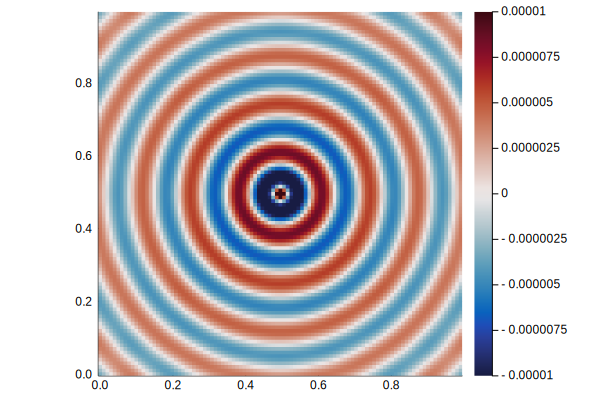

In [4]:
heatmap(x,y,real(u), ratio=1, color=:balance, clim=(-0.00001,0.00001))

In [5]:
using JLD2
@load "marmousi.jld2"

4-element Array{Symbol,1}:
 :vel
 :Nx 
 :Ny 
 :h  

In [6]:
x = range(0, length=Nx, step=h);
y = range(0, length=Ny, step=h);

# source
f = zeros(Nx, Ny);
f[200,5] = -1;

In [7]:
u = scalar_helmholtz_solver_2d(vel, f, fre, h, Nx, Ny);

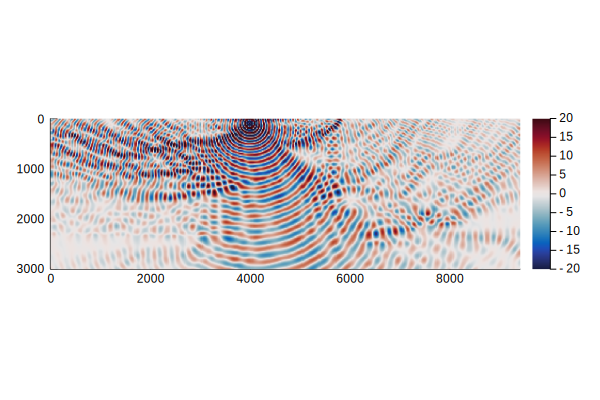

In [8]:
heatmap(x,y,real(u)', ratio=1, fillcolor=:balance, clim=(-20,20), yflip=true)